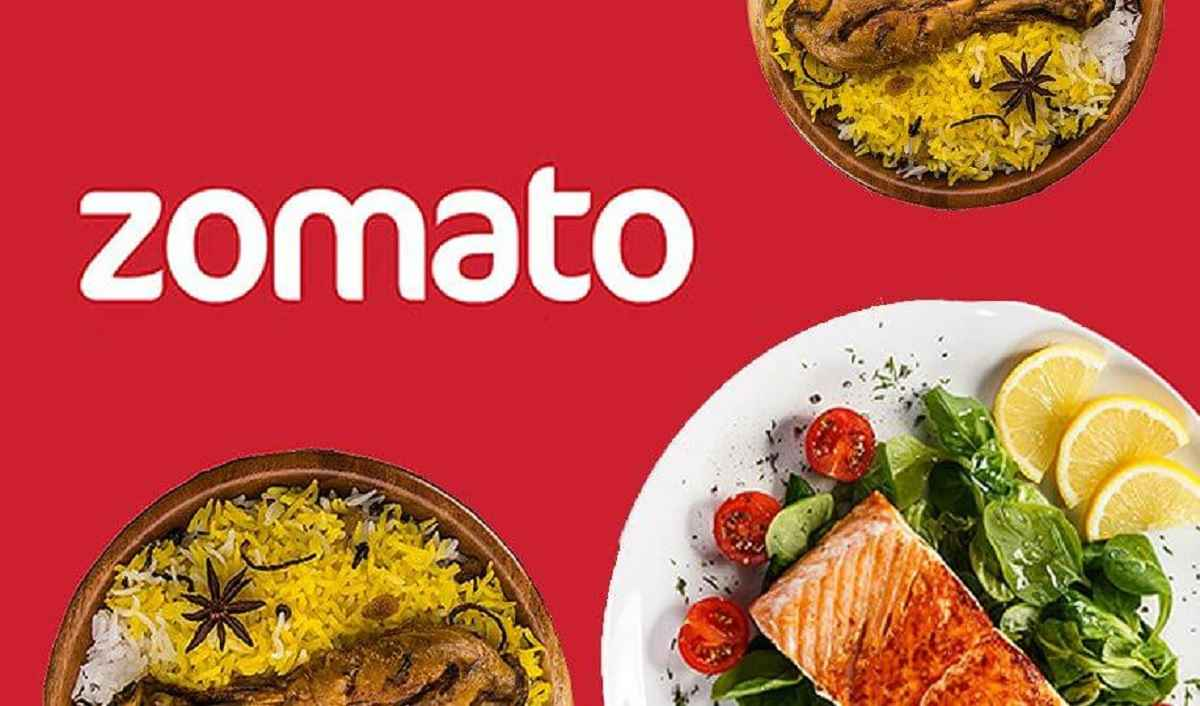

# PROBLEM STATEMENT

### As the demand for restaurant food in Bengaluru continues to increase, it has become increasingly difficult for new establishments to compete with established ones. This project aims to explore the factors that affect the establishment of different types of restaurants in Bengaluru, and to provide insights on the popular cuisines and locations for restaurant-goers in the city.

### Using the Zomato dataset, we will analyze various factors such as the location, theme, and approximate price of food, as well as the demographics of different localities, to determine which types of cuisines are most popular in certain areas of the city. By understanding these trends, we can help new restaurants better cater to the needs and preferences of their target audience, and ultimately enhance their chances of success in the competitive restaurant industry.

### Through this project, we hope to provide valuable insights for restaurant owners and investors, as well as for foodies who are seeking the best dining experiences in Bengaluru. This analysis can be used to inform business decisions, marketing strategies, and menu offerings, and can ultimately contribute to the growth and diversity of the restaurant industry in the city.

## About the Data
*url* : This feature contains the url of the restaurant on the Zomato website

*address* : This feature contains the address of the restaurant in Bangalore

*name* : This feature contains the name of the restaurant

*online_order* : whether online ordering is available in the restaurant or not

*book_table* : table book option available or not

*rate* : contains the overall rating of the restaurant out of 5

*votes* : contains total number of upvotes for the restaurant

*phone* : contains the phone number of the restaurant

*location* : contains the neighborhood in which the restaurant is located

*rest_type* : restaurant type

*dish_liked* : dishes people liked in the restaurant

*cuisines* : food styles, separated by comma

*approx_cost(for two people)* : contains the approximate cost of meal for two people

*reviews_list* : list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by 
the customer

*menu_item* : contains list of menus available in the restaurant

*listed_in(type)* : type of meal

*listed_in(city)* : contains the neighborhood in which the restaurant is located

### Breakdown of this notebook:
**Loading the dataset:** 

Load the data and import the libraries.

**Data Cleaning:**

1.Deleting redundant columns.

2.Renaming the columns.

3.Dropping duplicates.

4.Cleaning individual columns.

5.Remove the NaN values from the dataset

6.Some Transformations

**Data Visualization:**

1.Correltion Table

2.Restaurants delivering Online or not

3.Restaurants allowing table booking or not

4.Types of Services

5.type and rating

6.Top 15 Restro with maximum number of outlets

7.Most famous restaurant chains in Bengaluru

8.Best Location

**Regression Analysis:**

1.Logistic Regression

2.Decision Tree

3.K-Nearest Neighbors

4.Random Forest

5.Support Vector Machine

6.Gradient Boosting

7.Naive bayes


## 1. Importing required libraries

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error as rmse

In [2]:
# Import Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.min_rows',None)

## 2. Collection / Load the Dataset

In [4]:
#Read the CSV File containing dataset using Pandas Library
df_original = pd.read_csv("zomato.csv")

In [5]:
df_original.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df_original.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df_original['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

## 3. Preprocessing the data

In [8]:
#Deleting Unnnecessary Columns
df_original = df_original.drop(['url','dish_liked','phone'],axis=1)

In [9]:
#Removing the Duplicates records
df_original.duplicated().sum()
df_original.drop_duplicates(inplace=True)

In [10]:
#Remove the NaN values from the dataset
df_original.isnull().sum()
df_original.dropna(how='any',inplace=True)

In [11]:
#Changing the Columns Names to proper names
df_original.columns
df_original = df_original.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df_original.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [12]:
#Convert cost objecttype into numerical type
df_original['cost'] = df_original['cost'].astype(str)
df_original['cost'] = df_original['cost'].apply(lambda x: x.replace(',','.'))
df_original['cost'] = df_original['cost'].astype(float)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [13]:
def categorize_rating(rate):
    if rate in ['NEW', '-']:  # Check for 'new' and '-'
        return None  # Replace 'new' and '-' with None (NaN)
    rating = float(rate.split('/')[0])  # Extract numerical rating before '/'
    if 0.0 <= rating < 2.0:
        return 'Bad'
    elif 2.0 <= rating < 3.0:
        return 'Average'
    elif 3.0 <= rating < 4.0:
        return 'Moderate'
    elif 4.0 <= rating <= 5.0:
        return 'Excellent'
    else:
        return 'Invalid Rating'

# Applying the function to create a new categorical column
df_original['Rating Category'] = df_original['rate'].apply(categorize_rating)

# Mapping categorical labels to numerical values
category_mapping = {
    'Bad': 0,
    'Average': 1,
    'Moderate': 2,
    'Excellent': 3
}

df_original['Rating Category Encoded'] = df_original['Rating Category'].map(category_mapping)

# Removing rows with NaN values (rows containing 'new' and '-')
df_original = df_original.dropna(subset=['Rating Category Encoded'])


In [14]:
df_original.drop('rate',axis=1)
df_original['Rating Category'].head()

0    Excellent
1    Excellent
2     Moderate
3     Moderate
4     Moderate
Name: Rating Category, dtype: object

In [15]:
df_original['Rating Category'].unique()

array(['Excellent', 'Moderate', 'Average', 'Bad'], dtype=object)

In [16]:
# Adjust the column names
df_original.name = df_original.name.apply(lambda x:x.title())
df_original.online_order.replace(('Yes','No'),(True, False),inplace=True)
df_original.book_table.replace(('Yes','No'),(True, False),inplace=True)
df_original.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [17]:
df_original.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Rating Category,Rating Category Encoded
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Excellent,3.0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Excellent,3.0
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Moderate,2.0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Moderate,2.0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Moderate,2.0


In [18]:
df = df_original.copy()

In [19]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city', 'Rating Category',
       'Rating Category Encoded'],
      dtype='object')

In [20]:
df = df.drop(['address','name','reviews_list','type', 'city'], axis=1)

In [21]:
df.head(2)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item,Rating Category,Rating Category Encoded
0,True,True,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[],Excellent,3.0
1,True,False,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[],Excellent,3.0


In [22]:
cat_to_num = df[['online_order','book_table','location','rest_type','cuisines','menu_item']]
le = LabelEncoder() 
for i in cat_to_num:
    df[i] = le.fit_transform(cat_to_num[i])

In [23]:
df.head(2)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item,Rating Category,Rating Category Encoded
0,1,1,4.1/5,775,1,24,1894,800.0,8242,Excellent,3.0
1,1,0,4.1/5,787,1,24,816,800.0,8242,Excellent,3.0


In [24]:
category_mapping = {
    'Bad': 0,
    'Average': 1,
    'Moderate': 2,
    'Excellent': 3
}

df['Rating Category Encoded'] = df['Rating Category'].map(category_mapping)

df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item,Rating Category,Rating Category Encoded
0,1,1,4.1/5,775,1,24,1894,800.0,8242,Excellent,3
1,1,0,4.1/5,787,1,24,816,800.0,8242,Excellent,3
2,1,0,3.8/5,918,1,19,653,800.0,8242,Moderate,2
3,0,0,3.7/5,88,1,73,2221,300.0,8242,Moderate,2
4,0,0,3.8/5,166,4,24,1921,600.0,8242,Moderate,2


In [25]:
df["Rating Category Encoded"] = pd.to_numeric(df["Rating Category Encoded"])

In [26]:
df['Rating Category Encoded'].head()

0    3
1    3
2    2
3    2
4    2
Name: Rating Category Encoded, dtype: int64

In [27]:
# Checking the number of restaurants in each rating class
np.unique(df["Rating Category Encoded"], return_counts = True)

(array([0, 1, 2, 3], dtype=int64),
 array([    5,  2211, 26726, 12295], dtype=int64))

## Exploratory Data Analysis for Zomato Dataset

### Correlation between different variables

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city', 'Rating Category',
       'Rating Category Encoded'],
      dtype='object')

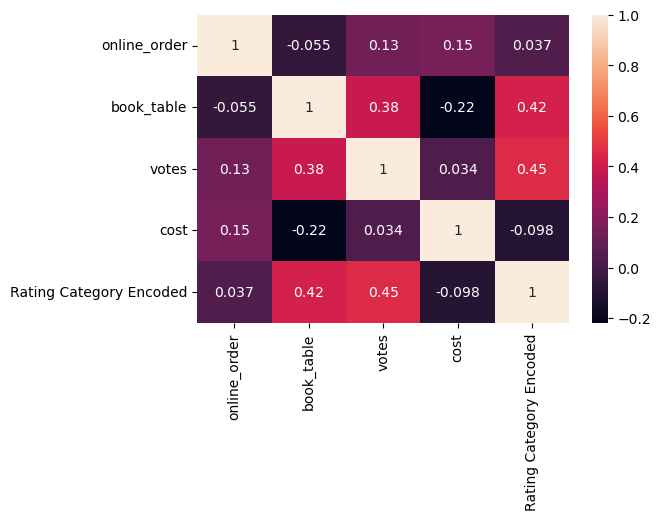

In [28]:
#Get Correlation between different variables
corr = df_original.corr(method='kendall')
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True)
df_original.columns

### Restaurants delivering Online or not

Text(0.5, 1.0, 'Restaurants delivering online or Not')

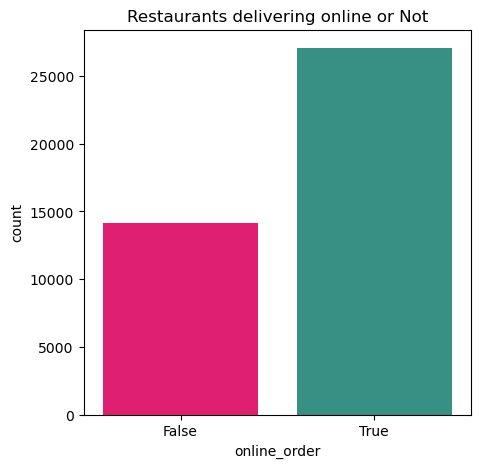

In [29]:
#Restaurants delivering Online or not
sns.countplot(data=df_original,x='online_order', palette = ['#ff006e','#2a9d8f'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Restaurants delivering online or Not')

In [30]:
df_original.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city', 'Rating Category',
       'Rating Category Encoded'],
      dtype='object')

### Restaurants allowing table booking or not

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

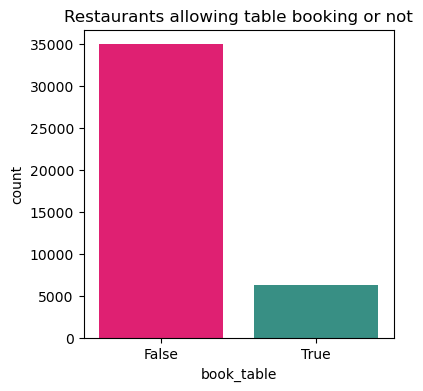

In [31]:
#Restaurants allowing table booking or not
sns.countplot(data=df_original,x='book_table', palette = ['#ff006e','#2a9d8f'])
fig = plt.gcf()
fig.set_size_inches(4,4)
plt.title('Restaurants allowing table booking or not')

### Types of Services

Text(0.5, 1.0, 'Type of Service')

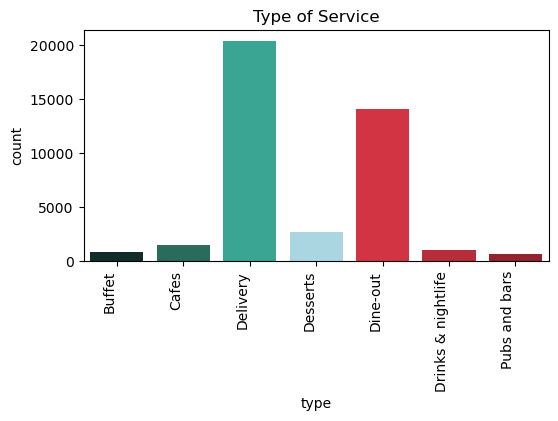

In [32]:
#Types of Services
sns.countplot(data=df_original , x='type' , palette = ["#0d322c","#1e7662","#28b79f","#a1dceb","#ed192e","#ce1628","#a61120"]
)
plt.xticks(rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(6,3)
plt.title('Type of Service')

### Type and Rating

<Figure size 9000x5000 with 0 Axes>

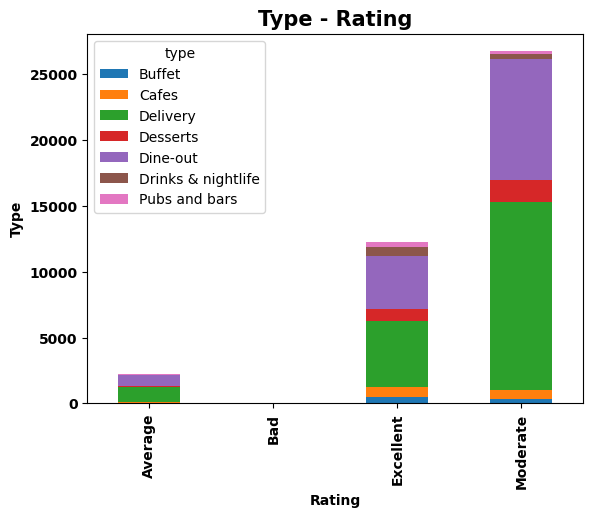

<Figure size 9000x5000 with 0 Axes>

In [33]:
#Type and Rating
type_plt=pd.crosstab(df_original['Rating Category'],df_original['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.figure(figsize=(90,50))

### Top 15 Restro with maximum number of outlets

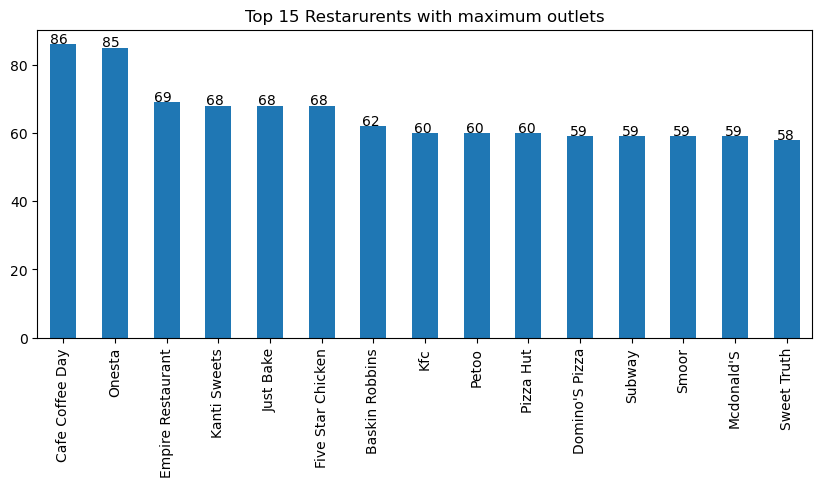

In [34]:
#Top 15 Restro with maximum number of outlets
ax=df_original['name'].value_counts().head(15).plot.bar(figsize =(10,4))
ax.set_title("Top 15 Restarurents with maximum outlets")
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() * 1.005, i.get_height() * 1.005))

### Most famous restaurant chains in Bengaluru

Text(0.5, 0, 'Number of outlets')

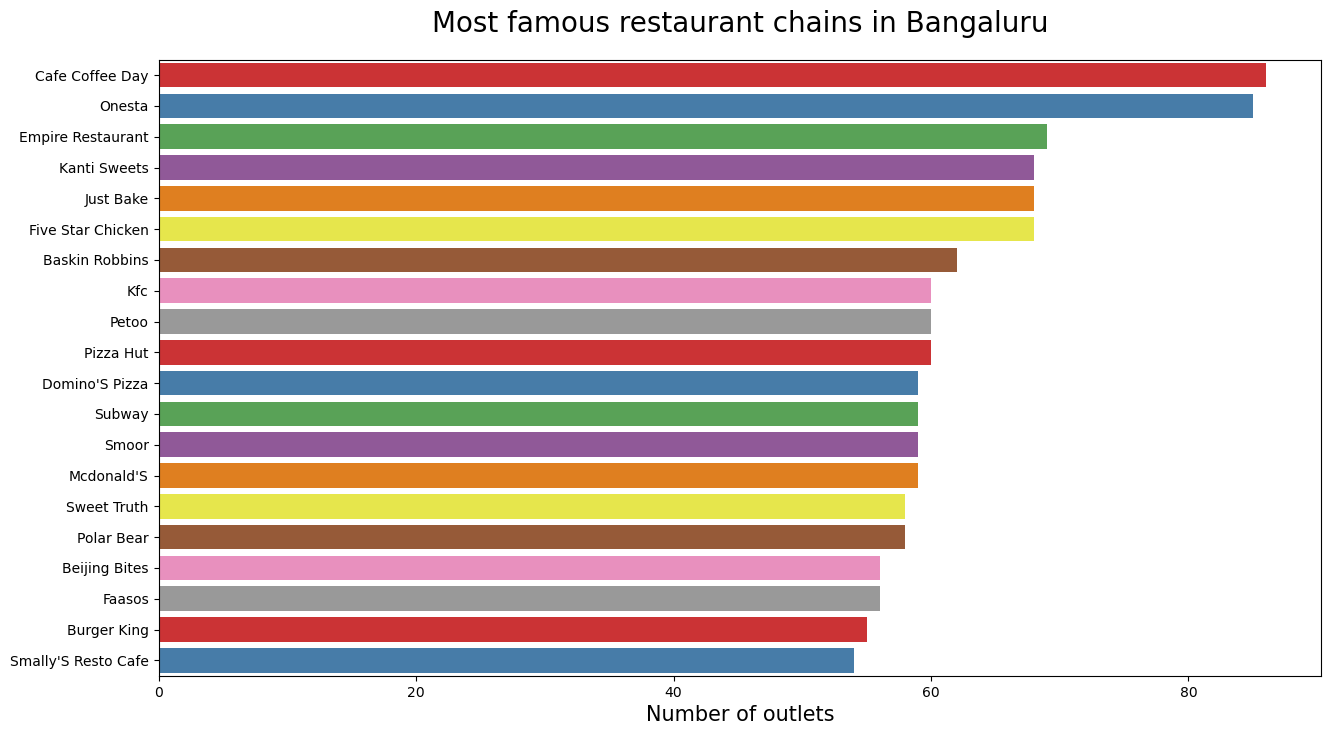

In [35]:
#Most famous restaurant chains in Bengaluru
plt.figure(figsize=(15,8))
chains=df_original['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

### Restaurant Count by Location

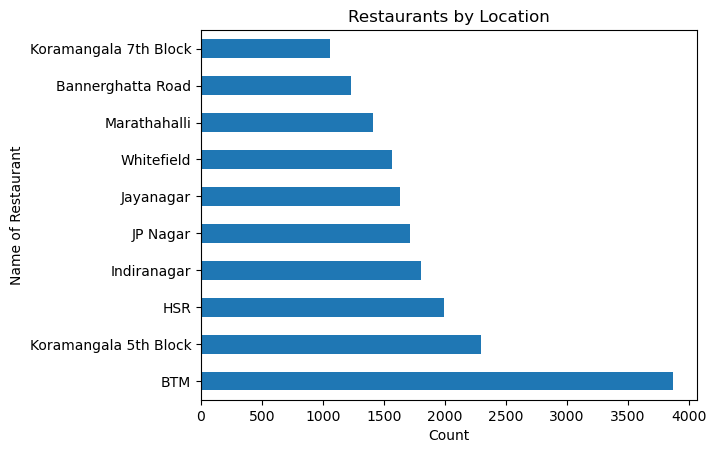

In [36]:
# Restaurant Count by Location
df_original.location.value_counts().nlargest(10).plot(kind="barh")
plt.title("Restaurants by Location")
plt.xlabel("Count")
plt.ylabel("Name of Restaurant")
plt.show()

### Model Building

In [37]:
#Defining the independent variables and dependent variables
x = df.iloc[:,[0,1,3,4,5,6,7,8]]
y = df['Rating Category Encoded']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=353)
x_train.head()
y_train.head()

12304    2
23961    2
40370    2
9597     2
49214    3
Name: Rating Category Encoded, dtype: int64

In [38]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

n= x_test.shape[0]
p= x_test.shape[1]

## 1. Logistic Regression Classifier

In [39]:

my_model = LogisticRegression()
result = my_model.fit(x_train, y_train)
predictions = result.predict(x_test)
predictions

print('Accracy of Logistic Regression Classifier :',accuracy_score(y_test, predictions))

confusion_mat = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual Label 0','Actual Label 1','Actual Label 2','Actual Label 3'], columns=['Predicted Label 0','Predicted Label 1','Predicted Label 2','Predicted Label 3'])
confusion_df


Accracy of Logistic Regression Classifier : 0.7783705140640155


,Predicted Label 0,Predicted Label 1,Predicted Label 2,Predicted Label 3
Actual Label 0,0,0,2,0
Actual Label 1,0,0,450,16
Actual Label 2,0,0,5031,279
Actual Label 3,0,0,1081,1389


In [40]:
r1 = my_model.score(x_test,y_test)

In [41]:
y_pred1=my_model.predict(x_test)
adj_r1 = 1-(1-r1)*(n-1)/(n-p-1)
my_model = np.sqrt(mean_squared_error(y_test,y_pred1))

In [42]:
my_model = np.sqrt(mean_squared_error(y_test,y_pred1))
my_model

0.47767826792001433

## 2. KNN Classifier

In [43]:
my_model = KNeighborsClassifier(n_neighbors=1)
result = my_model.fit(x_train,y_train)
predictions = result.predict(x_test)
matrix = confusion_matrix(y_test,predictions)
print("Accuracy of KNN Classifier:",accuracy_score(y_test, predictions))
confusion_df = pd.DataFrame(matrix, index=['Actual Label 0','Actual Label 1','Actual Label 2','Actual Label 3'], columns=['Predicted Label 0','Predicted Label 1','Predicted Label 2','Predicted Label 3'])
confusion_df


Accuracy of KNN Classifier: 0.9453200775945684


,Predicted Label 0,Predicted Label 1,Predicted Label 2,Predicted Label 3
Actual Label 0,2,0,0,0
Actual Label 1,0,380,73,13
Actual Label 2,0,87,5089,134
Actual Label 3,0,11,133,2326


In [44]:
r2 = my_model.score(x_test,y_test)

In [45]:
y_pred2=my_model.predict(x_test)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
my_model = np.sqrt(mean_squared_error(y_test,y_pred2))

In [46]:
my_model = np.sqrt(mean_squared_error(y_test,y_pred2))
my_model

0.2518120556053773

## 3. Random Forest classifier

In [47]:

my_model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
result=my_model.fit(x_train, y_train)
predictions = result.predict(x_test)
predictions
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
conf_matrix =confusion_matrix(predictions,y_test)
confusion_df = pd.DataFrame(conf_matrix, index=['Actual Label 0','Actual Label 1','Actual Label 2','Actual Label 3'], columns=['Predicted Label 0','Predicted Label 1','Predicted Label 2','Predicted Label 3'])
confusion_df

Accuracy: 0.9713870029097963


,Predicted Label 0,Predicted Label 1,Predicted Label 2,Predicted Label 3
Actual Label 0,2,0,0,0
Actual Label 1,0,383,13,2
Actual Label 2,0,80,5262,103
Actual Label 3,0,3,35,2365


In [48]:
r3 = my_model.score(x_test,y_test)

In [49]:
y_pred3=my_model.predict(x_test)
adj_r3 = 1-(1-r3)*(n-1)/(n-p-1)
my_model = np.sqrt(mean_squared_error(y_test,y_pred3))

In [50]:
my_model = np.sqrt(mean_squared_error(y_test,y_pred3))
my_model

0.17444661013219756

## 4. Support Vector Machine Classifier

In [51]:
my_model = SVC(kernel = 'rbf', random_state = 0)
result = my_model.fit(x_train, y_train)
predictions = result.predict(x_test)
predictions
print("Accuracy of Support Vector Machine Classifier:",accuracy_score(y_test, predictions))
conf_matrix =confusion_matrix(predictions,y_test)
confusion_df = pd.DataFrame(conf_matrix ,index=['Actual Label 0','Actual Label 1','Actual Label 2','Actual Label 3'], columns=['Predicted Label 0','Predicted Label 1','Predicted Label 2','Predicted Label 3'])
confusion_df

Accuracy of Support Vector Machine Classifier: 0.7924345295829291


,Predicted Label 0,Predicted Label 1,Predicted Label 2,Predicted Label 3
Actual Label 0,0,0,0,0
Actual Label 1,0,0,1,0
Actual Label 2,2,438,4979,913
Actual Label 3,0,28,330,1557


In [52]:
r4 = my_model.score(x_test,y_test)

In [53]:
y_pred4=my_model.predict(x_test)
adj_r4 = 1-(1-r4)*(n-1)/(n-p-1)
my_model = np.sqrt(mean_squared_error(y_test,y_pred4))

In [54]:
my_model = np.sqrt(mean_squared_error(y_test,y_pred4))
my_model

0.4674154539545503

## 5. Gradient Boosting Classifier

In [55]:

my_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1,random_state=0)
result = my_model.fit(x_train, y_train)
predictions = result.predict(x_test)
print("Accuracy of Support Gradient Boosting Classifier:",round(metrics.accuracy_score(y_test, predictions)*100,2))
conf_matrix =confusion_matrix(predictions,y_test)
confusion_df = pd.DataFrame(conf_matrix ,index=['Actual Label 0','Actual Label 1','Actual Label 2','Actual Label 3'], columns=['Predicted Label 0','Predicted Label 1','Predicted Label 2','Predicted Label 3'])
confusion_df

Accuracy of Support Gradient Boosting Classifier: 81.52


,Predicted Label 0,Predicted Label 1,Predicted Label 2,Predicted Label 3
Actual Label 0,2,0,0,0
Actual Label 1,0,0,1,0
Actual Label 2,0,437,4882,630
Actual Label 3,0,29,427,1840


In [56]:
r5 = my_model.score(x_test,y_test)

In [57]:
y_pred5=my_model.predict(x_test)
adj_r5 = 1-(1-r5)*(n-1)/(n-p-1)D
my_model = np.sqrt(mean_squared_error(y_test,y_pred5))

In [58]:
my_model = np.sqrt(mean_squared_error(y_test,y_pred5))
my_model

0.44195031122804784

## 6. Naive Bayes Classifier

In [59]:

my_model = GaussianNB()
result = my_model.fit(x_train,y_train)
predictions = result.predict(x_test)
predictions
print("Accuracy of Naive bayes Classifier id: ",round(accuracy_score(y_test,predictions)*100,2))
matrix = confusion_matrix(predictions,y_test,)
confusion_df = pd.DataFrame(matrix, index=['Actual Label 0','Actual Label 1','Actual Label 2','Actual Label 3'], columns=['Predicted Label 0','Predicted Label 1','Predicted Label 2','Predicted Label 3'])
confusion_df

Accuracy of Naive bayes Classifier id:  76.81


,Predicted Label 0,Predicted Label 1,Predicted Label 2,Predicted Label 3
Actual Label 0,2,0,0,0
Actual Label 1,0,0,0,0
Actual Label 2,0,451,4978,1115
Actual Label 3,0,15,332,1355


In [60]:
r6 = my_model.score(x_test,y_test)

In [61]:
y_pred6=my_model.predict(x_test)
adj_r6 = 1-(1-r6)*(n-1)/(n-p-1)
my_model = np.sqrt(mean_squared_error(y_test,y_pred6))

In [62]:
my_model = np.sqrt(mean_squared_error(y_test,y_pred6))
my_model

0.48722775232761045

### Accuracy of algorithms

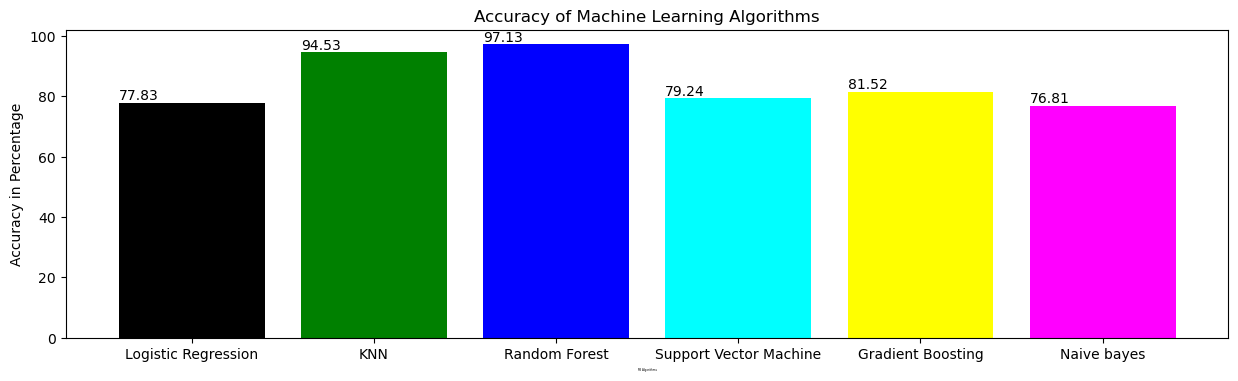

In [63]:
accuracy = [77.83, 94.53, 97.13, 79.24, 81.52, 76.81]
bars = ('Logistic Regression', 'KNN', 'Random Forest','Support Vector Machine', 'Gradient Boosting', 'Naive bayes')
plt.figure(figsize=(15,4))
y_pos = np.arange(len(bars))
bars = plt.bar(bars,height=accuracy, color=['black', 'green', 'blue', 'cyan', 'yellow', 'magenta'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 1,yval)

#plt.xticks(y_pos, bars)
plt.xlabel("Ml Algorithms",fontsize=2)
plt.ylabel("Accuracy in Percentage")
plt.title("Accuracy of Machine Learning Algorithms")
plt.show()